## 한글 폰트 설치

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,906 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

설치 후 런타임 다시시작

In [1]:
import numpy as np
from numpy import ndarray
from typing import *

np.set_printoptions(precision=4)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TEST_ALL = False

## 주택가격 데이터

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
data = boston.data
target = boston.target
features = boston.feature_names

## 싸이킷런으로 구현한 선형회귀

#### 데이터 준비

In [7]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

#### 선형회귀

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [12]:
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family = 'NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])

['NanumGothic']


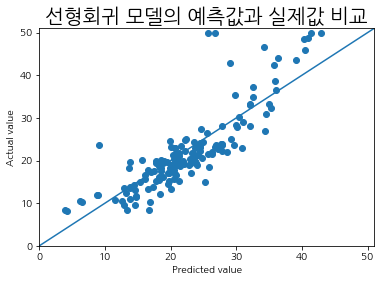

In [13]:
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('선형회귀 모델의 예측값과 실제값 비교', fontsize = 20)
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

#### 특징 값의 변화

Text(0.5, 1.0, '가장 중요도가 높은 특징값과 목표값의 관계')

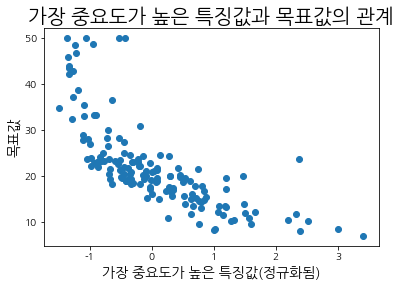

In [14]:
plt.scatter(X_test[:, 12], y_test)
plt.xlabel('가장 중요도가 높은 특징값(정규화됨)', fontsize = 14)
plt.ylabel('목표값', fontsize = 14)
plt.title('가장 중요도가 높은 특징값과 목표값의 관계', fontsize = 20)

선형적 관게가 아니다.

#### 모델의 오차

In [15]:
def mae(preds: ndarray, actuals: ndarray):
  """
  평균절대오차(MAE) 계산
  """
  return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
  """
  제곱근 평균제곱오차(RMSE) 계산
  """
  return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [16]:
print(f'평균제곱오차:{round(mae(preds, y_test), 4)} \n제곱근 평균제곱오차: {round(rmse(preds, y_test), 4)}')

평균제곱오차:3.5671 
제곱근 평균제곱오차: 5.0476


In [17]:
import numpy as np
np.round(lr.coef_, 2)

array([[-1.01,  0.71,  0.28,  0.71, -2.21,  2.38,  0.71, -2.66,  2.63,
        -1.82, -2.33,  0.85, -4.19]])

#### 선형회귀 직접 구현하기

In [22]:
from numpy import ndarray
from typing import *
import numpy as np
def forward_linear_regression(X_batch: ndarray,
                              y_batch: ndarray,
                              weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:
  """
  선형회귀의 순방향 계산 과정
  """
  # X와 y의 배치 크기가 같은지 확인
  assert X_batch.shape[0] == y_batch.shape[0]

  # 행렬곱 계산이 가능한지 확인
  assert X_batch.shape[1] == weights['W'].shape[0]

  # B의 모양이 1x1인지 확인
  assert weights['B'].shape[0] == weights['B'].shape[1] == 1

  # 순방향 계산 수행
  N = np.dot(X_batch, weights['W'])

  P = N + weights['B']
  
  loss = np.mean(np.power(y_batch - P, 2))

  # 순방향 계산 과정의 중간값 저장
  forward_info: DIct[str, ndarray] = {}
  forward_info['X'] = X_batch
  forward_info['N'] = N
  forward_info['P'] = P
  forward_info['y'] = y_batch

  return loss, forward_info

In [18]:
def to_2d_np(a: ndarray,
             type: str = 'col') -> ndarray:
  """
  1차원 텐서를 2차원으로 변환
  """

  assert a.ndim == 1, '입력하는 텐서는 1차원이어야 함.'

  if type == 'col':
    return a.reshape(-1, 1)
  elif type == 'row':
    return a.resahpe(1, -1)

In [19]:
def permute_data(X: ndarray, y: ndarray):
  """
  X와 y를 axis = 0 방향으로 짝이 맞도록 섞음
  """
  perm = np.random.permutation(X.shape[0])
  return X[perm], y[perm]

#### 모델 학습하기 - 도함수 계산과정

In [21]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
  """
  선형회귀 모형의 dLdW와 dLdB 계산
  """
  batch_size  = forward_info['X'].shape[0]
  
  dLdP = -2 * (forward_info['y'] - forward_info['P'])

  dPdN = np.ones_like(forward_info['N'])

  dPdB = np.ones_like(weights['B'])

  dLdN = dLdP * dPdN

  dNdW = np.transpose(forward_info['X'], (1, 0))

  # 여기서 행렬곱을 수행함
  # dNdW가 왼쪽에 와야 함(1장 마지막 부분 노트 참고)
  dLdW = np.dot(dNdW, dLdN)

  # 배치 크기에 해당하는 차원에 따라 합을 계산함
  # (1장 마지막 부분 노트 참고)
  dLdB = (dLdP * dPdB).sum(axis = 0)

  loss_gradients: Dict[str, ndarray] = {}
  loss_gradients['W'] = dLdW
  loss_gradients['B'] = dLdB

  return loss_gradients

In [20]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray,
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
  """
  주어진 위치부터 정해진 크기만큼의 X, y의 배치를 생성
  """
  assert X.ndim == y.ndim == 2, 'X와 y는 2차원이어야 함'

  if start + batch_size > X.shape[0]:
    batch_size = X.shape[0] - start

  X_batch, y_batch = X[start : start + batch_size], y[start : start + batch_size]

  return X_batch, y_batch

In [23]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
  """
  예측을 구하고 이에 대한 손실값을 계산한다.
  (주로 추론시 사용됨)
  """
  N = np.dot(X, weights['W'])

  P = N + weights['B']

  loss = np.mean(np.power(y - P, 2))

  forward_info: Dict[str, ndarray] = {}
  forward_info['X'] = X
  forward_info['N'] = N
  forward_info['P'] = P
  forward_info['y'] = y

  return forward_info, loss

In [24]:
def init_weights(n_in : int) -> Dict[str, ndarray]:
  """
  첫 번째 순방향 계산을 위해 가중치를 초기화
  """

  weights: Dict[str, ndarray] = {}
  W = np.random.randn(n_in, 1)
  B = np.random.randn(1, 1)

  weights['W'] = W
  weights['B'] = B

  return weights

#### 모델 학습하기 - 기울기를 활용해 모델 학습하기
다음 과정을 여러 번 반복한다.
1. 여러 개의 배치로 분활된 데이터 중 하나의 배치를 선택한다.
2. 순방향 계산을 수행한다.
3. 순방향 계산에서 구한 값을 이용해 역방향 계산을 수행한다.
4. 역방향 계산에서 구한 기울기를 이용해 가중치를 수정한다.

In [25]:
def train(X: ndarray,
          y: ndarray,
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False,
          return_weights: bool = False,
          seed: int = 1) -> None:
  """
  저해진 횟수만큼의 에폭 동안 모델을 학습
  """
  if seed:
    np.random.seed(seed)
  start = 0

  # 가중치 초기화
  weights = init_weights(X.shape[1])

  # 데이터 섞기
  X, y = permute_data(X, y)

  if return_losses:
    losses = []
  for i in range(n_iter):

    # 배치 생성
    if start >= X.shape[0]:
      X, y = permute_data(X, y)
      start = 0

    X_batch, y_batch = generate_batch(X, y, start, batch_size)
    start += batch_size

    # 생성한 배치로 학습
    forward_info, loss = forward_loss(X_batch, y_batch, weights)

    if return_losses:
      losses.append(loss)

    loss_grads = loss_gradients(forward_info, weights)
    for key in weights.keys():
      weights[key] -= learning_rate * loss_grads[key]
  
  if return_weights:
    return losses, weights
  
  return None

In [27]:
# train 수행
train_info = train(X_train, y_train,
                   n_iter = 1000,
                   learning_rate = 0.001,
                   batch_size = 23,
                   return_losses = True,
                   return_weights = True,
                   seed = 180708)

losses = train_info[0]
weights = train_info[1]

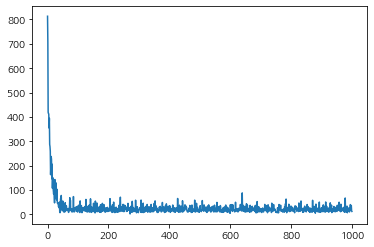

In [28]:
plt.plot(list(range(1000)), losses)

#### 모델 성능을 평가하는 코드

In [29]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]):
  """
  선형회귀 모델로 예측하기
  """

  N = np.dot(X, weights['W'])

  return N + weights['B']

In [30]:
# 예측값 계산

preds = predict(X_test, weights)

In [31]:
print(f'평균절대오차: {round(mae(preds, y_test), 4)} \n제곱근 평균제곱오차: {round(rmse(preds, y_test), 4)}')

평균절대오차: 3.5644 
제곱근 평균제곱오차: 5.0497


In [32]:
# y_test 평균값

np.round(y_test.mean(), 4)

22.0776

In [33]:
# 모델의 예측값

np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.2287

제곱근 평균 제곱오차는 약 23%

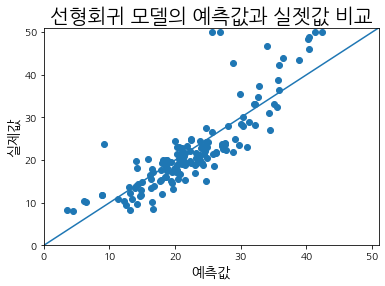

In [34]:
plt.xlabel("예측값", fontsize = 14)
plt.ylabel("실제값", fontsize = 14)
plt.title("선형회귀 모델의 예측값과 실젯값 비교", fontsize = 20)
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

#### 중요도가 가장 높은 특징 분석하기

In [36]:
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis = 0, keepdims = True), NUM, axis = 0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a,b], axis =1)
test_preds = predict(test_feature, weights)[:, 0]

Text(0.5, 1.0, '선형회귀 모델에서 가장 중요도가 높은 특징과 실제값, 예측값 비교')

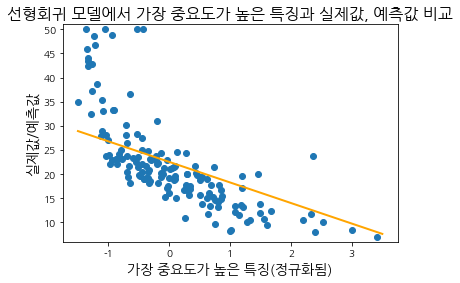

In [38]:
plt.scatter(X_test[:, 12], y_test)
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("가장 중요도가 높은 특징(정규화됨)", fontsize = 14)
plt.ylabel("실제값/예측값", fontsize = 14)
plt.title("선형회귀 모델에서 가장 중요도가 높은 특징과 실제값, 예측값 비교", fontsize = 16)

#### 가장 중요도가 높은 특징과 목표값 사이의 이론적 관계

In [40]:
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis = 0, keepdims = True), NUM, axis = 0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

In [41]:
test_feature = np.concatenate([a, b], axis=1)
preds = predict(test_feature, weights)[:, 0]

(6.0, 51.0)

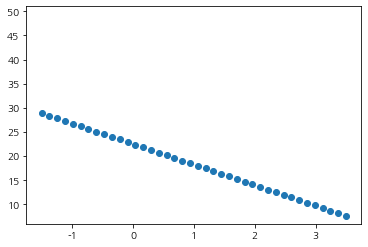

In [42]:
plt.scatter(np.array(test_feature[:, -1]), np.array(preds))
plt.ylim([6, 51])

## 밑바닥부터 만드는 신경망

### 신경망 모델을 이용한 회귀

#### 비선형 함수

In [43]:
def sigmoid(x: ndarray) -> ndarray:
  return 1 / (1 + np.exp(-1.0 * x))

Text(0, 0.5, '$sigmoid(x)$')

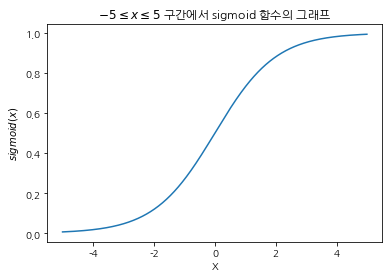

In [44]:
plt.plot(np.arange(-5, 5, 0.01),
         sigmoid(np.arange(-5, 5, 0.01)));
plt.title("$-5 \leq x \leq 5$ 구간에서 sigmoid 함수의 그래프")
plt.xlabel("X")
plt.ylabel("$sigmoid(x)$")

In [45]:
def init_weights(input_size: int,
                 hidden_size: int) -> Dict[str, ndarray]:
  """
  신경망 모델의 가중치 초기화
  """
  weights: Dict[str, ndarray] = {}
  weights['W1'] = np.random.randn(input_size, hidden_size)
  weights['B1'] = np.random.randn(1, hidden_size)
  weights['W2'] = np.random.randn(hidden_size, 1)
  weights['B2'] = np.random.randn(1, 1)
  return weights

In [46]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
  """
  신경망 모델의 순방향 계산 및 손실값 계산을 단계별로 수행
  """
  M1 = np.dot(X, weights['W1'])

  N1 = M1 + weights['B1']

  O1 = sigmoid(N1)

  M2 = np.dot(O1, weights['W2'])

  P = M2 + weights['B2']

  loss = np.mean(np.power(y - P, 2))

  forward_info: Dict[str, ndarray] = {}
  forward_info['X'] = X
  forward_info['M1'] = M1
  forward_info['N1'] = N1
  forward_info['O1'] = O1
  forward_info['M2'] = M2
  forward_info['P'] = P
  forward_info['y'] = y

  return forward_info, loss

#### 신경망 모델의 역방향 계산
1. 합성함수를 구성하는 각 함수의 도함수를 구하고, 입력값에 대한 함수의 함숫값을 계산한다.
2. 각 함숫값을 차례대로 곱한다.

In [48]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
  """
  신경망의 각 파라미터에 대한 손실의 편미분을 계산
  """
  dLdP = -(forward_info['y'] - forward_info['P'])

  dPdM2 = np.ones_like(forward_info['M2'])

  dLdM2 = dLdP * dPdM2

  dPdB2 = np.ones_like(weights['B2'])

  dLdB2 = (dLdP * dPdB2).sum(axis = 0)
  
  dM2dW2 = np.transpose(forward_info['O1'], (1, 0))

  dLdW2 = np.dot(dM2dW2, dLdP)

  dM2dO1 = np.transpose(weights['W2'], (1, 0))

  dLdO1 = np.dot(dLdM2, dM2dO1)

  dO1dN1 = sigmoid(forward_info['N1']) * (1 - sigmoid(forward_info['N1']))

  dLdN1 = dLdO1 * dO1dN1

  dN1dB1 = np.ones_like(weights['B1'])

  dN1dM1 = np.ones_like(forward_info['M1'])

  dLdB1 = (dLdN1 * dN1dB1).sum(axis = 0)

  dLdM1 = dLdN1 * dN1dM1

  dM1dW1 = np.transpose(forward_info['X'], (1, 0))

  dLdW1 = np.dot(dM1dW1, dLdM1)

  # 전체 손실값의 기울기
  loss_gradients: Dict[str, ndarray] = {}
  loss_gradients['W2'] = dLdW2
  loss_gradients['B2'] = dLdB2.sum(axis = 0)
  loss_gradients['W1'] = dLdW1
  loss_gradients['B1'] = dLdB1.sum(axis = 0)

  return loss_gradients

## 첫번째 신경망 모델의 학습과 성능 평가

In [49]:
def train(X_train: ndarray, y_train: ndarray,
          X_test: ndarray, y_test: ndarray,
          n_iter: int = 1000,
          test_every: int = 1000,
          learning_rate: float = 0.01,
          hidden_size= 13,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False, 
          return_scores: bool = False,
          seed: int = 1) -> None:

    if seed:
        np.random.seed(seed)

    start = 0

    # 가중치 초기화
    weights = init_weights(X_train.shape[1], 
                           hidden_size=hidden_size)

    # 데이터 섞기
    X_train, y_train = permute_data(X_train, y_train)
    

    losses = []
        
    val_scores = []

    for i in range(n_iter):

        # 배치 생성
        if start >= X_train.shape[0]:
            X_train, y_train = permute_data(X_train, y_train)
            start = 0
        
        X_batch, y_batch = generate_batch(X_train, y_train, start, batch_size)
        start += batch_size
    
        # 생성한 배치로 학습 수행
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]
        
        if return_scores:
            if i % test_every == 0 and i != 0:
                preds = predict(X_test, weights)
                val_scores.append(r2_score(preds, y_test))

    if return_weights:
        return losses, weights, val_scores
    
    return None

In [50]:
# 예측
def predict(X: ndarray,
            weights: Dict[str, ndarray]) -> ndarray:
  """
  신경망 모델에서 단계별로 예측값 구하기
  """
  M1 = np.dot(X, weights['W1'])

  N1 = M1 + weights['B1']

  O1 = sigmoid(N1)

  M2 = np.dot(O1, weights['W2'])

  P = M2 + weights['B2']

  return P

In [51]:
if TEST_ALL:
    num_iter = 10000
    test_every = 1000
    train_info = train(X_train, y_train, X_test, y_test,
                       n_iter=num_iter,
                       test_every = test_every,
                       learning_rate = 0.001,
                       batch_size=23, 
                       return_losses=False, 
                       return_weights=True, 
                       return_scores=False,
                       seed=80718)
    losses = train_info[0]
    weights = train_info[1]
    val_scores = train_info[2]

In [52]:
if TEST_ALL:
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.ylim([-1,1])
    plt.plot(list(range(int(num_iter / test_every - 1))), val_scores); 
    plt.xlabel("배치 (000s)")
    plt.title("검증 점수")

#### 학습률 조정

In [53]:
def r2_score_lr(learning_rate):
    train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=100000,
                   test_every = 100000,
                   learning_rate = learning_rate,
                   batch_size=23, 
                   return_losses=False, 
                   return_weights=True, 
                   return_scores=False,
                   seed=80718)
    weights = train_info[1]
    preds = predict(X_test, weights)
    return r2_score(y_test, preds)

In [54]:
if TEST_ALL:
  lrs = np.geomspace(1e-2, 1e-6, num = 20)

In [55]:
if TEST_ALL:
  r2s = [r2_score_lr(lr) for lr in lrs]

In [56]:
if TEST_ALL:
  plt.semilogx(lrs, r2s)

#### 모델 평가

In [59]:
train_info = train(X_train, y_train, X_test, y_test,
                   n_iter = 10000,
                   test_every = 1000,
                   learning_rate = 0.001,
                   batch_size = 23,
                   return_losses = True,
                   return_weights = True,
                   return_scores = False,
                   seed = 180807)
losses = train_info[0]
weights = train_info[1]

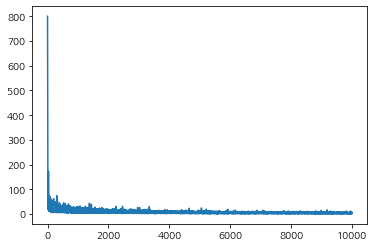

In [60]:
plt.plot(list(range(10000)), losses)

In [61]:
preds = predict(X_test, weights)

#### 중요도가 높은 특징 찾기
절대값이 9보다 높은 두가지가 가장 중요도 높은 특징의 조합이다.

In [62]:
weights['W2']

array([[  6.8818],
       [  7.3908],
       [  5.632 ],
       [  7.2358],
       [  7.6253],
       [  6.754 ],
       [  3.3251],
       [  9.7287],
       [  5.6011],
       [-10.2469],
       [  5.5645],
       [  5.6762],
       [ -4.4088]])

여기서는 인덱스 7과 9에 해당한다. 이들의 조합은 다음과 같다.

In [63]:
weights['W1'][7]

array([-3.3532e+00, -4.6775e-01,  5.4810e-01, -8.8043e-02,  1.7536e+00,
       -5.3111e+00, -9.4313e-01, -5.8730e-01, -1.2341e-03,  1.1375e+00,
       -5.2801e-01,  1.1592e+00,  1.6007e+00])

In [64]:
weights['W1'][9]

array([-2.6785,  3.9213,  2.2398, -3.6323, -0.2241,  3.1889,  0.3231,
        0.4316, -1.9733,  0.2403, -1.4463, -0.5084,  1.5561])

In [65]:
print(f'평균절대오차: {round(mae(preds, y_test), 4)} \n제곱근 평균제곱오차: {round(rmse(preds, y_test), 4)}')

평균절대오차: 2.5951 
제곱근 평균제곱오차: 3.8851


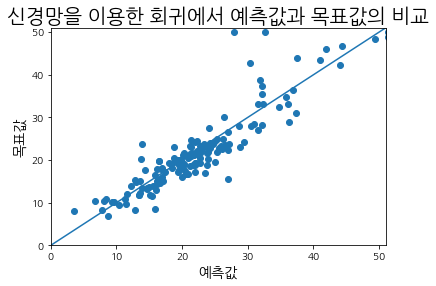

In [66]:
plt.xlabel("예측값",fontsize = 14)
plt.ylabel("목표값", fontsize = 14)
plt.title("신경망을 이용한 회귀에서 예측값과 목표값의 비교", fontsize = 20)
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

#### 중요도가 높은 특징과 목표값의 이론적 관계

In [67]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
preds_test = predict(test_feature, weights)[:, 0]

Text(0.5, 1.0, '신경망을 이용한 회귀에서 가장 중요도가 높은 특징과 목표값, 예측값의 비교')

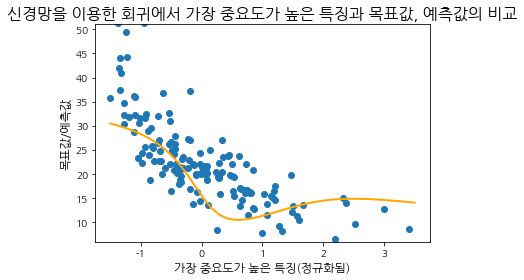

In [68]:
plt.scatter(X_test[:, 12], preds)
plt.plot(np.array(test_feature[:, -1]), preds_test, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("가장 중요도가 높은 특징(정규화됨)", fontsize = 12)
plt.ylabel("목표값/예측값", fontsize = 12)
plt.title("신경망을 이용한 회귀에서 가장 중요도가 높은 특징과 목표값, 예측값의 비교", fontsize = 16)

#### 성능이 개선된 두가지 이유
1. 예측값과 특징값의 관계가 비선형적이고, 이 관계가 점으로 표현된 특징값과 목표값의 관계와 매우 비슷함. 따라서 비선형 함수를 추가하면 반복적으로 가중치를 수정하는 과정만으로 입력과 출력간의 비선형적인 관계를 학습한다는 것을 알 수 있음.

2. 신경망 모델은 최초로 정의한 특징 그대로가 아니라 특징의 조합과 목표갑소가 관계를 학습할 수 있음. 행렬곱으로 새로 만든 13개의 학습된 특징을 이용하기 대문에 가능함. 이 새로운 특징은 최초로 정의한 특징의 조합이며, 조합된 특징에 선형회귀 모델이 한 번 더 적용됨.